<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/pca/otro_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [29]:
from sklearn.datasets import load_iris

In [5]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = data.drop("species", axis = 1)

In [7]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
np.shape(X)

(150, 4)

In [18]:
cov_matrix = np.cov(X.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [19]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [20]:
eig_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [21]:
eig_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [22]:
eig_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [23]:
W = eig_vectors[:, :2]
X_pca = X.dot(W)

In [24]:
X_pca[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

In [25]:
data_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
data_pca = pd.concat([data_pca, data['species']], axis = 1)
data_pca.head()

,PC1,PC2,species
0,-2.264703,-0.480027,setosa
1,-2.080961,0.674134,setosa
2,-2.364229,0.341908,setosa
3,-2.299384,0.597395,setosa
4,-2.389842,-0.646835,setosa


In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # Import ListedColormap

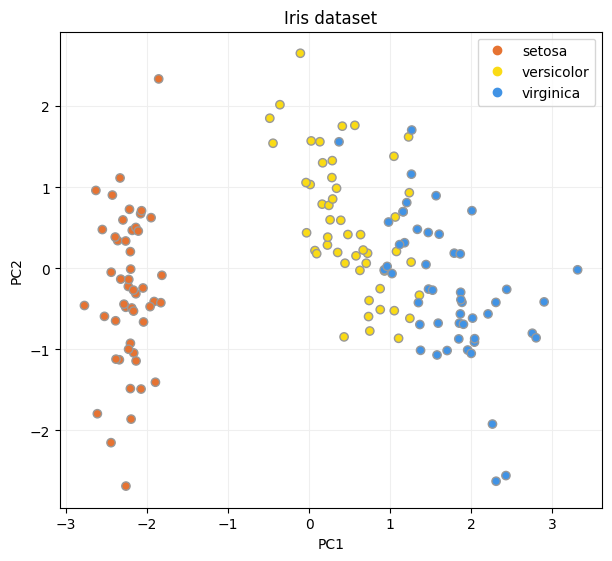

In [28]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.set_aspect("equal")
scatter = ax.scatter(
    x = data_pca.PC1, y = data_pca.PC2,
    c = data_pca.species.astype("category").cat.codes,
    zorder = 2, edgecolor = "#999999",
    cmap = ListedColormap(["#E67332", "#FADB15", "#4193E5"])
)
ax.set_title("Iris dataset")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend(
    handles = scatter.legend_elements()[0],
    labels = list(data_pca.species.unique())
)
ax.grid(color = "#EEEEEE", zorder = 1, alpha = 0.9)
plt.show()